# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Цели проекта:
- Приоритизируйте гипотезы
- запустите A/B-тест
- проанализируйте результаты

## Приоритизация гипотез

В файле "/datasets/hypothesis.csv" 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

### Выгрузка даных и первое знакомство

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis.columns = hypothesis.columns.str.lower()

**Вывод:** Файл с 9 гипотезами, требующими приоритизации добавлены в файл **hypothesis**. Файл небольшой, всего 9 строк на 5 столбцов. Типы данных у каждого из столбов соответствующие. Пропусков не обноружено, значения каждого из параметров в пределах нормы. Единственное, что пришлось сделать - привести названия столбцов к нижнему регистру. Можем переходить к следующему этапу.

### Приоритизация по фреймворку ICE

Создадим новый столбец **'ice'**, в котором будет храниться оцена по данной формуле:

![](https://i.ibb.co/0qqNTXT/ICE.jpg)

Где:
- impact означает насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта
- confidence означает насколько вы уверены, что это изменение повлияет на пользователей именно так
- efforts означает сколько стоит протестировать эту гипотезу

In [4]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'ice']].sort_values(by = 'ice', ascending = False).values

array([['Запустить акцию, дающую скидку на товар в день рождения', 16.2],
       ['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
        13.333333333333334],
       ['Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
        11.2],
       ['Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
        8.0],
       ['Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
        7.0],
       ['Запустить собственную службу доставки, что сократит срок доставки заказов',
        2.0],
       ['Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
        1.3333333333333333],
       ['Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
        1.125],
       ['Изменить цвет фона главной страницы, что

**Вывод:** 
- Гипотеза **"Запустить акцию, дающую скидку на товар в день рождения"** имеет наивысший рейтинг, равный 16.2, по расчетам фреймворка ICE
- На втором месте **"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"** с показателем 13.3
- На третьем месте **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"** с показателем 11.2

### Приоритизация по фреймворку RICE

Создадим новый столбец **'rice'**, в котором будет храниться оцена по данной формуле:

![](https://i.ibb.co/kBtKCTt/rice.jpg)

Где:
- reach означает скольких пользователей затронет изменение, которое вы хотите внести
- impact означает насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта
- confidence означает насколько вы уверены, что это изменение повлияет на пользователей именно так
- efforts означает сколько стоит протестировать эту гипотезу



In [5]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'rice']].sort_values(by = 'rice', ascending = False).values

array([['Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
        112.0],
       ['Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
        56.0],
       ['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
        40.0],
       ['Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
        40.0],
       ['Запустить акцию, дающую скидку на товар в день рождения', 16.2],
       ['Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
        9.0],
       ['Запустить собственную службу доставки, что сократит срок доставки заказов',
        4.0],
       ['Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
        4.0],
       ['Изменить цвет фона главной страницы, чтобы увеличить вовлеченность п

**Вывод:** 
- Гипотеза **"Запустить акцию, дающую скидку на товар в день рождения"**, лидер по версии фреймворка ICE, сместилась на 5 позицию, т.к. её показатель Reach составляет всего 1. Это обусловленно тем, что данная гипотеза порверяет акцию, которая затрагивает только 1/365 клиентов в день, что явно не соответствует более высокой оценке охвата.
- Гипотеза **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"** с третьего места по версии фреймворка ICE переместилась на 1ое, т.к. данное нововведение охватит абсолютно всех пользователей.
- Гипотезы **"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"** и **"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"** теперь делят третье место.
- Гипотеза **"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"** благодаря широкому охвату, переместилась со 4го на 2ое место, однако уступает первому по оценке RICE в 2 раза.

## Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

### Задача:

Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

### Подготовка данных

Выгрузим результаты А/В-теста в соответствующие файлы и посмотрим информацию:

In [6]:
orders = pd.read_csv('/datasets/orders.csv') 
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Файл **orders** содержит информацию о 1197 покупках, совершенных за время проведения А/В-теста. В названиях столбцов есть большие буквы, поэтому приведем их к нижнему регистру. Каждая покупка имеет информацию о:
- Уникальный идентификатор покупки
- Уникальный идентификатор покупателя
- Дата совершения покупки (В формате Object, стоит изменить на Дату)
- Стоимости покупки
- Контрольная группа (А или В)

In [7]:
visitors = pd.read_csv('/datasets/visitors.csv') 
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Файл **visitors** содержит информацию о количестве посетителей интернет-магазина за 31 день А/В-теста (62 строки разделить на 2 группы).

Стоит так же изменить формат столбца **data**.

In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = pd.to_datetime(visitors['date'])
orders.columns = orders.columns.str.lower()

Проверим, совпадают ли диапазоны дат в обоих файлах:

In [9]:
print('Первая дата в файле orders:',
      orders['date'].astype('str').min(),
      'Первая дата в файле visitors:',
      visitors['date'].astype('str').min()
     )

print('Последняя дата в файле orders:',
      visitors['date'].astype('str').max(),
      'Последняя дата в файле visitors:',
      visitors['date'].astype('str').max()
     )

Первая дата в файле orders: 2019-08-01 Первая дата в файле visitors: 2019-08-01
Последняя дата в файле orders: 2019-08-31 Последняя дата в файле visitors: 2019-08-31


### Анализ результатов А/В-теста

#### Кумулятивная выручка по группам

Для рассчета кумулятивной выручки создаём массив из всех сочетаний дат и групп:

In [10]:
datesGroups = orders[['date','group']].drop_duplicates()

Расчитываем кумулятивную выручку на каждую дату:

In [11]:
ordersAggregated = datesGroups.apply(lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']).reset_index()
ordersAggregated.head()

,index,date,group,revenue
0,55,2019-08-01,A,148579
1,66,2019-08-01,B,101217
2,175,2019-08-02,A,242401
3,173,2019-08-02,B,266748
4,291,2019-08-03,A,354874


Строим графики кумулятивной выручки:

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


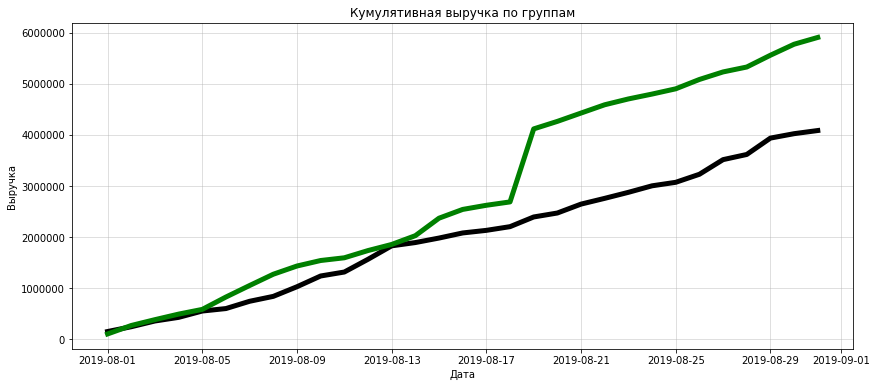

In [12]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(ordersAggregated[ordersAggregated['group'] == 'A'][['date']], ordersAggregated[ordersAggregated['group'] == 'A'][['revenue']], label = 'A', color = 'black', linewidth = 5)  
ax.plot(ordersAggregated[ordersAggregated['group'] == 'B'][['date']], ordersAggregated[ordersAggregated['group'] == 'B'][['revenue']], label = 'B', color = 'green', linewidth = 5) 
ax.grid(alpha = 0.5)       
ax.set(title='Кумулятивная выручка по группам',
       ylabel= 'Выручка',
       xlabel = 'Дата')
plt.show()

**Вывод:** 
- Кумулятивная выручка группы А опережает кумулятивную выручку группы В только в первый день, в дальнейшем группа В лидирует с разной степенью опережения.
- 2019.08.18-2019.08.19 кумулятивная выручка группы В резко возрастает. Это может быть анамальнодорогая покупка, которая никак не связана с тестом. В дальнейшем разберемся с этим подробнее.
- В целом, разницу в темпе роста кумулятивной выручки по группам визуально различить сложно, однако, постоянное опережение группы В даже до появления аномального роста вселяет надежду в успешность А/В-теста.

#### Кумулятивный средний чек
 
Для вычисления кумулятивного среднего чека добавим в файл **ordersAggregated** новый столбец с данными о кумулятивном количестве покупок:

In [13]:
ordersAggregated['orders'] = datesGroups.apply(lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid': 'nunique'}), axis=1).sort_values(by=['date','group']).reset_index()[['transactionid']]
ordersAggregated['avg_bill'] = ordersAggregated['revenue'] / ordersAggregated['orders']
ordersAggregated = ordersAggregated.drop('index', 1)

ordersA = ordersAggregated[ordersAggregated['group'] == 'A'].reset_index()
ordersA = ordersA.drop('index', 1)
ordersB = ordersAggregated[ordersAggregated['group'] == 'B'].reset_index()
ordersB = ordersB.drop('index', 1)

ordersAggregated.head()

,date,group,revenue,orders,avg_bill
0,2019-08-01,A,148579,24,6190.791667
1,2019-08-01,B,101217,21,4819.857143
2,2019-08-02,A,242401,44,5509.113636
3,2019-08-02,B,266748,45,5927.733333
4,2019-08-03,A,354874,68,5218.735294


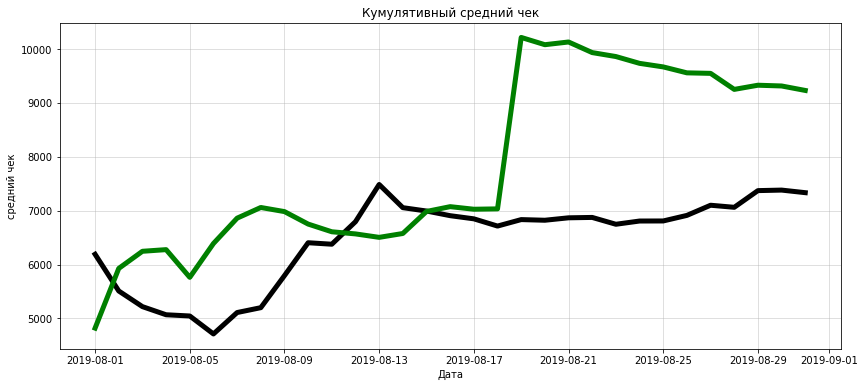

In [14]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(ordersA['date'], ordersA[['avg_bill']], label = 'A', color = 'black', linewidth = 5)  
ax.plot(ordersB['date'], ordersB[['avg_bill']], label = 'B', color = 'green', linewidth = 5) 
ax.grid(alpha = 0.5)       
ax.set(title='Кумулятивный средний чек',
       ylabel= 'средний чек',
       xlabel = 'Дата')
plt.show()

**Вывод:**
- В те же  даты, что и на предыдущем графике, сильный скачок у группы В. Все больше убеждаемся, что тут кроется сильный выброс в виде большой покупки.
- Средний чек обеих групп за анализируемый период возрос
- Падение показателя для группы В после резкого скачка не означает, что её дела хуже группы А, просто значение на дистанции возвращается к реальным показателям после влияния аномалии.

#### График относительного изменения кумулятивного среднего чека группы B к группе A

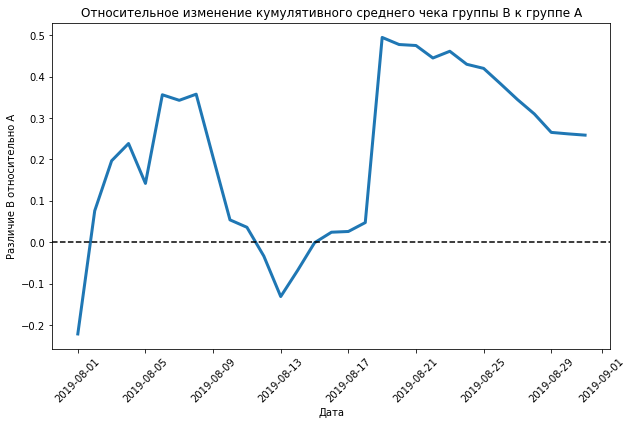

In [15]:
plt.subplots(figsize=(10, 6))
plt.plot(ordersA['date'], (ordersB['avg_bill'] / ordersA['avg_bill'] - 1), linewidth = 3)

plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.ylabel('Различие В относительно А')
plt.xlabel('Дата')
plt.xticks(rotation = 45)
plt.show()

**Вывод:**
- Средний чек группы В на протяжении практически всего периода исследования выше среднего чека группы А
- 2019-08-19 средний чек группы В выше ср. чека группы А в полтора раза! Это все влияние аномальной покупки.

#### График кумулятивной конверсии по группам

Для расчета кумулятивной конверсии нам понадобится добавить к нашему файлу **ordersAggregated** столбец с информацией о посетителях:

In [16]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis = 1).sort_values(by=['date','group'])
DataAggregated = ordersAggregated.merge(visitorsAggregated, on = ['date', 'group'])
DataAggregated.columns = ['date', 'group', 'revenue', 'orders', 'avg_bill', 'visitors']
DataAggregated.head()

,date,group,revenue,orders,avg_bill,visitors
0,2019-08-01,A,148579,24,6190.791667,719
1,2019-08-01,B,101217,21,4819.857143,713
2,2019-08-02,A,242401,44,5509.113636,1338
3,2019-08-02,B,266748,45,5927.733333,1294
4,2019-08-03,A,354874,68,5218.735294,1845


Теперь "прикрутим" данные о количестве уникальных покупателей и посчитаем конверсию:

P.S. Стоило, конечно, собрать все данные сразу, а не добавлять их, но я начал делать все по очереди и выводить только необходимые данные для конктерной задачи. Ну и демонстрация Вам, что вроде как понимаю, как работает код, а не просто копировал из тренажера, хотя в реальной работе, я бы выбрал более простой и путь =)

In [17]:
DataAggregated['buyers'] = datesGroups.apply(lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitorid': 'nunique'}), axis=1).sort_values(by=['date','group']).reset_index()[['visitorid']]
DataAggregated['conv'] = DataAggregated['buyers'] / DataAggregated['visitors']
DataAggregated.head()

,date,group,revenue,orders,avg_bill,visitors,buyers,conv
0,2019-08-01,A,148579,24,6190.791667,719,20,0.027816
1,2019-08-01,B,101217,21,4819.857143,713,20,0.028050
2,2019-08-02,A,242401,44,5509.113636,1338,38,0.028401
3,2019-08-02,B,266748,45,5927.733333,1294,43,0.033230
4,2019-08-03,A,354874,68,5218.735294,1845,62,0.033604


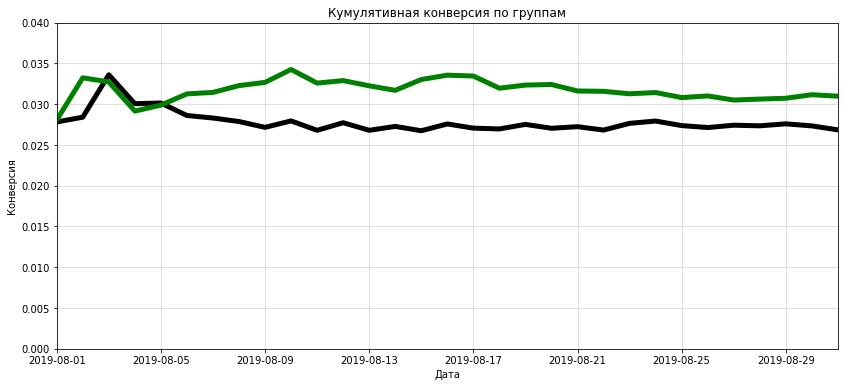

In [18]:

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(DataAggregated[DataAggregated['group'] == 'A']['date'], DataAggregated[DataAggregated['group'] == 'A'][['conv']], label = 'A', color = 'black', linewidth = 5)  
ax.plot(DataAggregated[DataAggregated['group'] == 'A']['date'], DataAggregated[DataAggregated['group'] == 'B'][['conv']], label = 'B', color = 'green', linewidth = 5) 
ax.grid(alpha = 0.5)       
ax.set(title='Кумулятивная конверсия по группам',
       ylabel= 'Конверсия',
       xlabel = 'Дата')
plt.axis(["2019-08-01", '2019-08-31', 0, 0.04])
plt.show()

**Вывод:** В первые дни теста сильное колебание значений, но после 5го августа чётко заметно более высокое значение конверсии для группы В относительно группы А. По результатам "сырых" данным мы можем сделать вывод, что конверсия группы В выше, но остается открытым вопрос: ощутимо ли выше?

#### График относительного изменения кумулятивной конверсии группы B к группе A

In [19]:
DataAggregatedA = DataAggregated[DataAggregated['group'] == 'A'].reset_index()
del DataAggregatedA['index']
DataAggregatedB = DataAggregated[DataAggregated['group'] == 'B'].reset_index()
del DataAggregatedB['index']

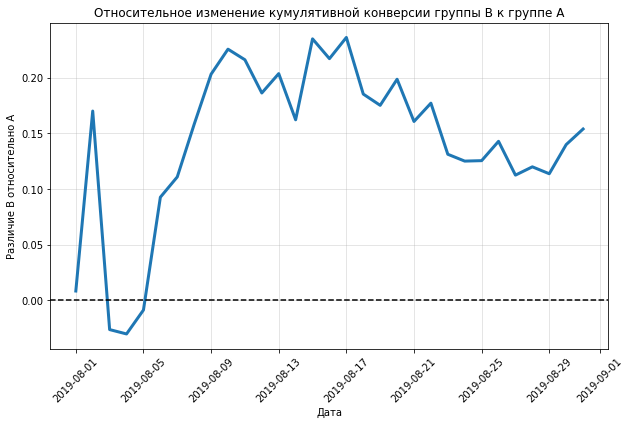

In [20]:
plt.subplots(figsize=(10, 6))
plt.plot(ordersA['date'], (DataAggregatedB['conv'] / DataAggregatedA['conv'] - 1), linewidth = 3)

plt.xticks(rotation = 45)
plt.axhline(y=0, color='black', linestyle='--') 
plt.grid(alpha = .4)
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.ylabel('Различие В относительно А')
plt.xlabel('Дата')
plt.show()

**Вывод:** Кумулятивная конверсия группы В превысила Кумулятивную конверсию группы А больше чем на 15% на момент последних данных.

#### Точечный график количества заказов по пользователям

Для построения графика по количеству заказов на пользователя нам необходимо эту информацию высчитать из файла **orders**:

In [21]:
OrdersPerUser = orders.groupby('visitorid').agg({'transactionid':'count'}).reset_index()
OrdersPerUser.columns = ['visitorid', 'purchases']
OrdersPerUser.head()

,visitorid,purchases
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


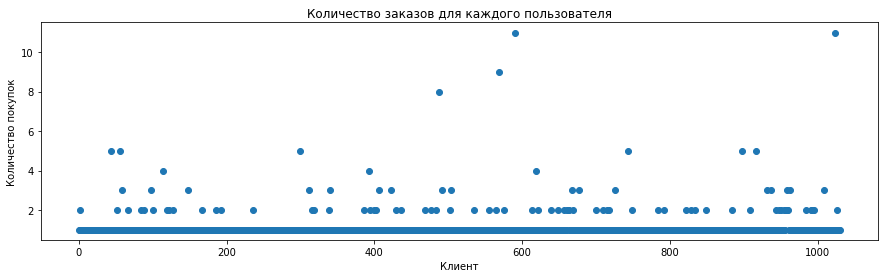

In [22]:
plt.subplots(figsize=(15, 4))
plt.scatter(pd.Series(range(0,len(OrdersPerUser))), OrdersPerUser['purchases']) 
plt.title('Количество заказов для каждого пользователя')
plt.ylabel('Количество покупок')
plt.xlabel('Клиент')
plt.show()

**Вывод:** как видно, большинство покупателей совершали всего одну покупку. 2-3 встречаются, но довольно редко. Случаи 4-5 покупок на одного клиента можно пересчитать по пальцам, но в данных присутствуют несколько челвек и с 8-11 покупками - это явно аномальные показатели и нам стоит оценить результаты теста без их влияния.

#### 95-й и 99-й перцентили количества заказов на пользователя. Граница аномальных пользователей

In [23]:
np.percentile(OrdersPerUser['purchases'].astype('float64'), [95, 99], interpolation='linear')

array([2., 4.])

**Вывод:** 95% покупателей совершают 2 и меньше покупок - это означает, что 3 и больше покупок совершает не больше 5% покупателей. 5 и более покупок оформляли менее 1% клиентов. Считаю, что стоит установить границу анамальных заказов равную "3 и более".

#### Точечный график стоимостей заказов

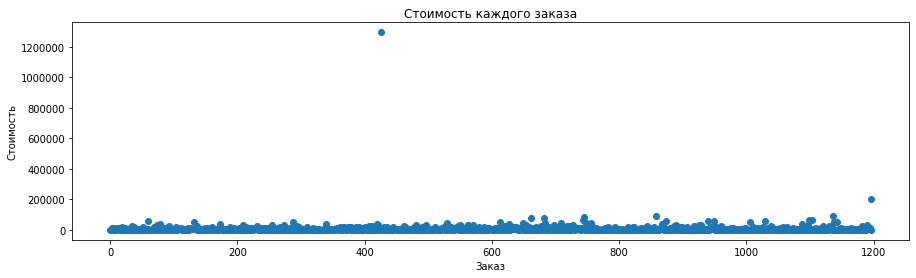

In [24]:
plt.subplots(figsize=(15, 4))
plt.scatter(pd.Series(range(0,len(orders))), orders['revenue']) 
plt.title('Стоимость каждого заказа')
plt.ylabel('Стоимость')
plt.xlabel('Заказ')
plt.show()

**Вывод:** Так и хочется сказать "А я же говорил!", но не буду, потому что это было слишком очевидно. У нас есть всего одна грандиозная покупка, но какая - дороже 1.2 млна!

In [25]:
orders['revenue'].max()

1294500

#### 95-й и 99-й перцентили стоимости заказов. Граница аномальных заказов

In [26]:
np.percentile(orders['revenue'], [95, 99], interpolation='linear')

array([28000. , 58233.2])

**Вывод:** Покупки дороже 28000 совершает всего около 5% клиентов, а дороже 58233.2 - менее 1%. Считаю, что аномальной суммой заказа стоит считать 30000 и больше.

#### Статистическая значимость различий в конверсии между группами по «сырым» данным



In [27]:
OrdersPerUserA = orders[orders['group'] == 'A'].groupby('visitorid').agg({'transactionid':'count'}).reset_index()
OrdersPerUserA.columns = ['visitorid', 'purchases']
OrdersPerUserB = orders[orders['group'] == 'B'].groupby('visitorid').agg({'transactionid':'count'}).reset_index()
OrdersPerUserB.columns = ['visitorid', 'purchases']

sampleA = pd.concat([OrdersPerUserA['purchases'], pd.Series(0, index = np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(OrdersPerUserA['purchases'])), name = 'purchases')], axis=0)
sampleB = pd.concat([OrdersPerUserB['purchases'], pd.Series(0, index = np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(OrdersPerUserB['purchases'])), name = 'purchases')], axis=0)

Так как данные о конверсии группы А распределены не нормально из-за значительного влияния выбросов (в нашем случае одного, но сильно влияющего), для определения значимости различий конверсии нам необходимо сформулировать Н0 и Н1 и применить U-критерий Манна-Уитни:

**Н0:** Значение показателя конверсии группы А, основанное на "сырых" данных, **равно** (или очень близко) значению показателя конверсии группы В, основанному на "сырых" данных.

**Н1:** Значение показателя конверсии группы А, основанное на "сырых" данных, **не равно** значению показателя конверсии группы В, основанному на "сырых" данных.

In [28]:
alpha = 0.01
results = st.mannwhitneyu(sampleA, sampleB)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.008396177528376304
Отвергаем нулевую гипотезу: разница статистически значима


**Вывод:** Нам не удалось подтвердить нулевую гипотезу, т.к. разница примерно в 16% статистически оказалась значима даже при критическом уровене статистической значимости всего в 1%.

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Так как данные о среднем чеке обеих групп распределены не нормально из-за значительного влияния выбросов, для определения значимости различий конверсии нам необходимо сформулировать Н0 и Н1 и применить U-критерий Манна-Уитни:

**Н0:** Значение показателя среднего чека группы А, основанное на "сырых" данных, **равно** (или очень близко) значению показателя среднего чека группы В, основанному на "сырых" данных.

**Н1:** Значение показателя среднего чека группы А, основанное на "сырых" данных, **не равно** значению показателя среднего чека группы В, основанному на "сырых" данных.

In [29]:
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])

print('p-значение: ', results.pvalue.round(3))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.365
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [30]:
print('Относительное различие среднего чека:', ((orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean()-1) * 100).round(1), '%')

Относительное различие среднего чека: 25.9 %


**Вывод:** Нам не удалось отвергнуть нулевую гипотезу, т.к. разница среднего чека группы А и В примерно в 26% статистически оказалась не значима.

#### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Границы аномальных значений выбраны, теперь узнаем, сколько клиентов совершили аномальные покупки, будь то их количество или сумма покупки:

In [31]:
usersWithManyOrders = pd.concat(
    [
        OrdersPerUserA[OrdersPerUserA['purchases'] > 2]['visitorid'],
        OrdersPerUserB[OrdersPerUserB['purchases'] > 2]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Количество клиентов с аномальными покупками:', len(abnormalUsers))

Количество клиентов с аномальными покупками: 68


Исключим 68 этих клиентов из данных и проверим гипотезы по обновленным данным.

**Н0:** Значение показателя конверсии группы А, основанное на "очищенных" данных, **равно** (или очень близко) значению показателя конверсии группы В, основанному на "очищенных" данных.

**Н1:** Значение показателя конверсии группы А, основанное на "очищенных" данных, **не равно** значению показателя конверсии группы В, основанному на "очищенных" данных.

In [32]:
sampleAFiltered = pd.concat([OrdersPerUserA[np.logical_not(OrdersPerUserA['visitorid'].isin(abnormalUsers))]['purchases'], 
                             pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(OrdersPerUserA['purchases'])), 
                                       name='purchases')],
                            axis=0)

sampleBFiltered = pd.concat([OrdersPerUserB[np.logical_not(OrdersPerUserB['visitorid'].isin(abnormalUsers))]['purchases'], 
                             pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(OrdersPerUserB['purchases'])), 
                                       name='purchases')],
                            axis=0)

alpha = 0.05
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение: ', results.pvalue.round(4))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.0067
Отвергаем нулевую гипотезу: разница статистически значима


In [33]:
print('Относительное различие конверсии:', ((sampleBFiltered.mean()/sampleAFiltered.mean()-1) * 100).round(1), '%')


Относительное различие конверсии: 17.2 %


**Вывод:** Нам не удалось подтвердить гипотезу о равенстве значений конверсии группы А и группы В. Разницы в 17.2% хватило, чтобы считать наш А/В-тест удачным.

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Мы уже определили ID клиентов, которые совершили аномальные действия в период теста, поэтому мы можем просто их отфильтровать и произвести проверку гипотез снова:

**Н0:** Значение показателя среднего чека группы А, основанное на "очищенных" данных, **равно** (или очень близко) значению показателя среднего чека группы В, основанному на "очищенных" данных.

**Н1:** Значение показателя среднего чека группы А, основанное на "очищенных" данных, **не равно** значению показателя среднего чека группы В, основанному на "очищенных" данных.

In [34]:
alpha = 0.05
results = st.mannwhitneyu(orders[(orders['group'] == 'A') & (~orders['visitorid'].isin(abnormalUsers))]['revenue'], orders[(orders['group'] == 'B') & (~orders['revenue'].isin(abnormalUsers))]['revenue'])

print('p-значение: ', results.pvalue.round(3))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.085
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [35]:
print('Относительное различие среднего чека:', ((orders[(orders['group'] == 'B') & (~orders['visitorid'].isin(abnormalUsers))]['revenue'].mean() / orders[(orders['group'] == 'A') & (~orders['visitorid'].isin(abnormalUsers))]['revenue'].mean()-1) * 100).round(1), '%')

Относительное различие среднего чека: -2.3 %


**Вывод:** Без учета аномальных покупок, различие среднего чека изменилось с 25.9% до -2.3%. При таком низком значении, естественно нам не удалось отвергнуть нулевую гипотезу об отсутсвии статистически значимых различий в среднем чеке групп А и В.

#### Решения по результатам А/В-теста

Наше решение в корне зависит от одного фактора: какие показатели для бизнеса - ключевые. 
    
**Вариант №1** Если на данном этапе жизни бизнеса ключевым показателем является конверсия посетителей в клиентов, то, считаю, что А/В-тест необходимо остановить и признать успешным, т.к. показатели конверсии для группы В выше, чем у группы А на 17.2% (по "очищенным" данным).

**Вариант №2** Если на данном этапе жизни бизнеса ключевым показателем является размер среднего чека клиента, то, считаю, что А/В-тест необходимо остановить и признать неудачным, т.к. во-первых, к концу тестового периода данные по среднему чеку перестало "штормить" и они демонстрировали стабильную динамику, во-вторых, по результатам "очищенных" данных, на которые в первую очередь необходимо обращать внимание в данном кейсе, средний чек группы В оказался ниже среднего чека группы А.